In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the Titanic dataset into a Pandas DataFrame
dataset = pd.read_csv('/content/train.csv')

# Display the first few rows to get an overview of the data structure
dataset.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
# Check the dimensions of the dataset (number of rows and columns)
# Analyze categorical variables (e.g., value counts)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# Identify missing values and decide on strategies for handling them
dataset['Pclass'].value_counts(dropna=False) #to also see NaN values

,count
Pclass,
3,491
1,216
2,184


In [20]:
# Compute basic statistics (e.g., mean, median, min, max) for numerical columns
max_age = dataset['Age'].max()
min_age = dataset['Age'].min()
mean_age = dataset['Age'].mean()
median_age = dataset['Age'].median()
total_passengers = dataset.shape[0]

print(f"Total number of passengers in the dataframe is {total_passengers}")
print(f"Maximum age is {max_age}")
print(f"Minimum age is {min_age}")
print(f"Mean age of passengers in the dataframe is {mean_age:.2f}")
print(f"Median age of passengers in the dataframe is {median_age}")

Total number of passengers in the dataframe is 891
Maximum age is 80.0
Minimum age is 0.42
Mean age of passengers in the dataframe is 29.70
Median age of passengers in the dataframe is 28.0


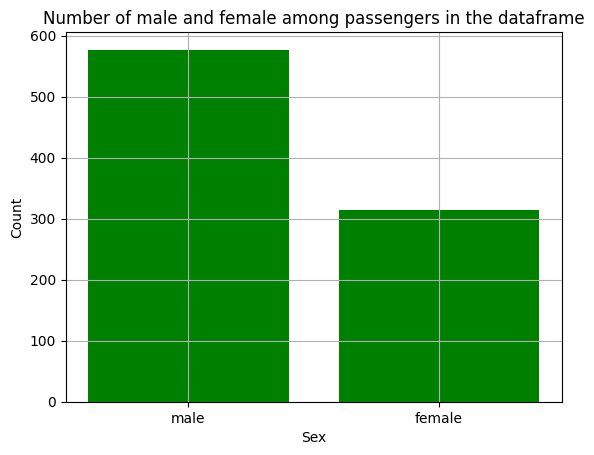

In [27]:
# Choose one column of the dataset that interests you
# Use Matplotlib pyplot to create a meaningful visualization:
# Select an appropriate plot type (e.g., bar chart, histogram, pie chart)
# Label axes, add a title
# Ensure the visualization is clear, informative, and visually appealing

data_sex = dataset['Sex'].value_counts(dropna=False)
plt.title('Number of male and female among passengers in the dataframe')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.bar(data_sex.index, data_sex.values, color = 'green')
plt.grid(True)
plt.show()

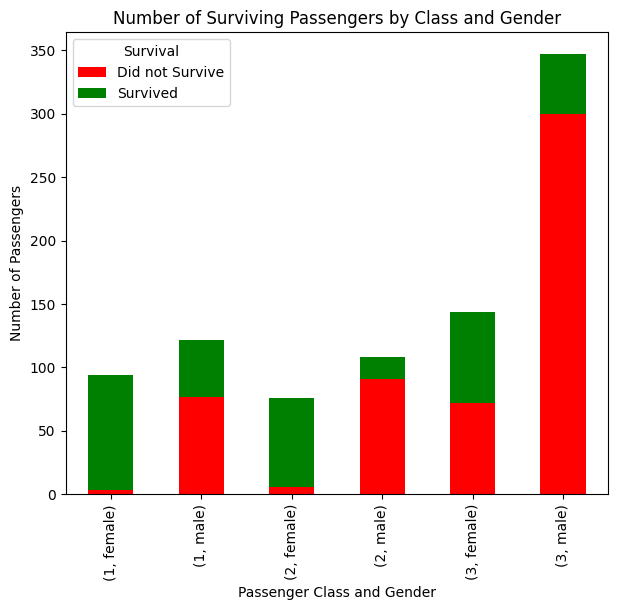

In [31]:
# A bar chart that shows the number of surviving passengers
# among male and female passengers in 1st, 2nd, and 3rd classes

# Group the data by Pclass, Sex, and Survived to count the number of survivors
survival_counts = dataset.groupby(['Pclass', 'Sex', 'Survived']).size().unstack()

survival_counts.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(7, 6))

plt.title('Number of Surviving Passengers by Class and Gender')
plt.xlabel('Passenger Class and Gender')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)
plt.legend(['Did not Survive', 'Survived'], title='Survival')

plt.show()